In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.duplicated().sum()

33

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(5695, 2)

In [10]:
df['num_chars'] = df['text'].apply(len)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14112\1410551383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chars'] = df['text'].apply(len)


In [11]:
from nltk import word_tokenize, sent_tokenize

In [12]:
df['num_words'] = df['text'].apply(lambda x:len(word_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_14112\3305274246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(word_tokenize(x)))


In [13]:
df['num_sent'] = df['text'].apply(lambda x:len(sent_tokenize(x)))

C:\Users\ACER\AppData\Local\Temp\ipykernel_14112\4256612905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x:len(sent_tokenize(x)))


In [14]:
df

,text,spam,num_chars,num_words,num_sent
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9
...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30
5726,"Subject: re : interest david , please , call...",0,1060,277,6


In [15]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [16]:
df['text'].str.startswith('Subject: re :').value_counts()

text
False    3893
True     1802
Name: count, dtype: int64

In [33]:
df['is_reply'] = df['text'].apply(lambda x: 1 if 'Subject: re :' in x else 0)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14112\2301502259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_reply'] = df['text'].apply(lambda x: 1 if 'Subject: re :' in x else 0)


In [34]:
df

,text,spam,num_chars,num_words,num_sent,is_reply
0,Subject: naturally irresistible your corporate...,1,1484,325,11,0
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,0
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,0
3,Subject: 4 color printing special request add...,1,500,99,5,0
4,"Subject: do not have money , get software cds ...",1,235,53,9,0
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,1
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,1
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,1
5726,"Subject: re : interest david , please , call...",0,1060,277,6,1


<Axes: >

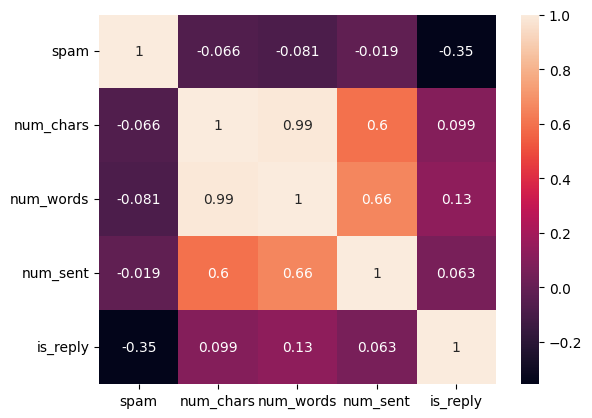

In [41]:
sns.heatmap(df[['spam','num_chars', 'num_words','num_sent', 'is_reply']].corr(), annot=True)

# Interpretation:
- spam -> is_reply: Indicates that if there is reply, chance for it to be spam is less.
- spam -> 'num_chars', 'num_words', 'num_sent': Weak correlation. As the char. count increases, there is slight chance that mail is not spam

<Axes: xlabel='is_reply', ylabel='count'>

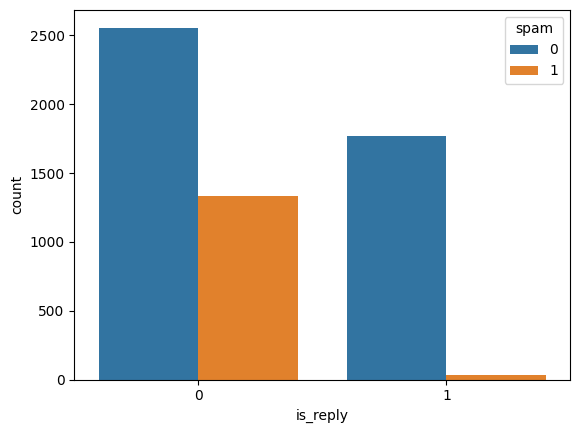

In [45]:
sns.countplot(x='is_reply', data=df, hue='spam')

- Reply messages tend to have extremely less spam chance

In [47]:
df.columns

Index(['text', 'spam', 'num_chars', 'num_words', 'num_sent', 'is_reply'], dtype='object')

<Axes: >

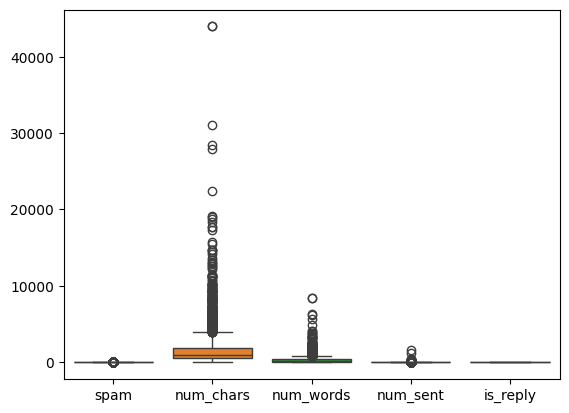

In [51]:
sns.boxplot(df)

In [58]:
df = df[df['num_chars'] < 20000]

<Axes: >

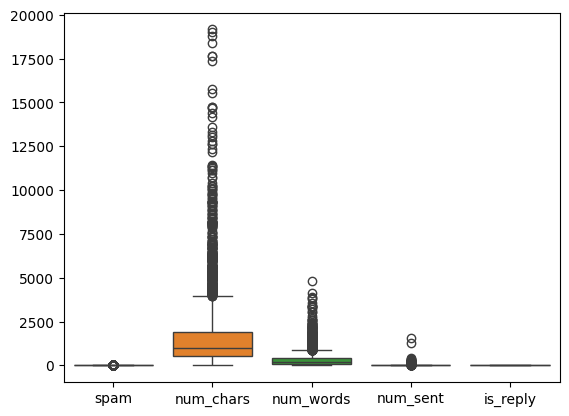

In [59]:
sns.boxplot(df)

<Axes: xlabel='num_chars', ylabel='Count'>

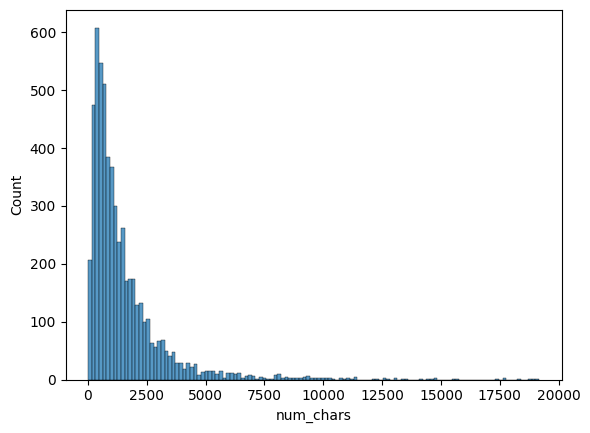

In [79]:
sns.histplot(df['num_chars'])

<Axes: xlabel='num_words', ylabel='Count'>

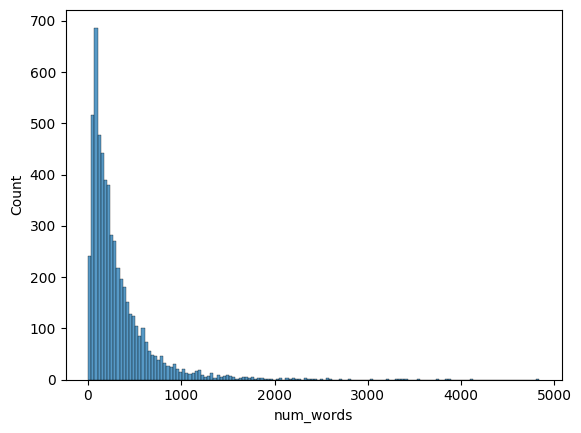

In [80]:
sns.histplot(df['num_words'])

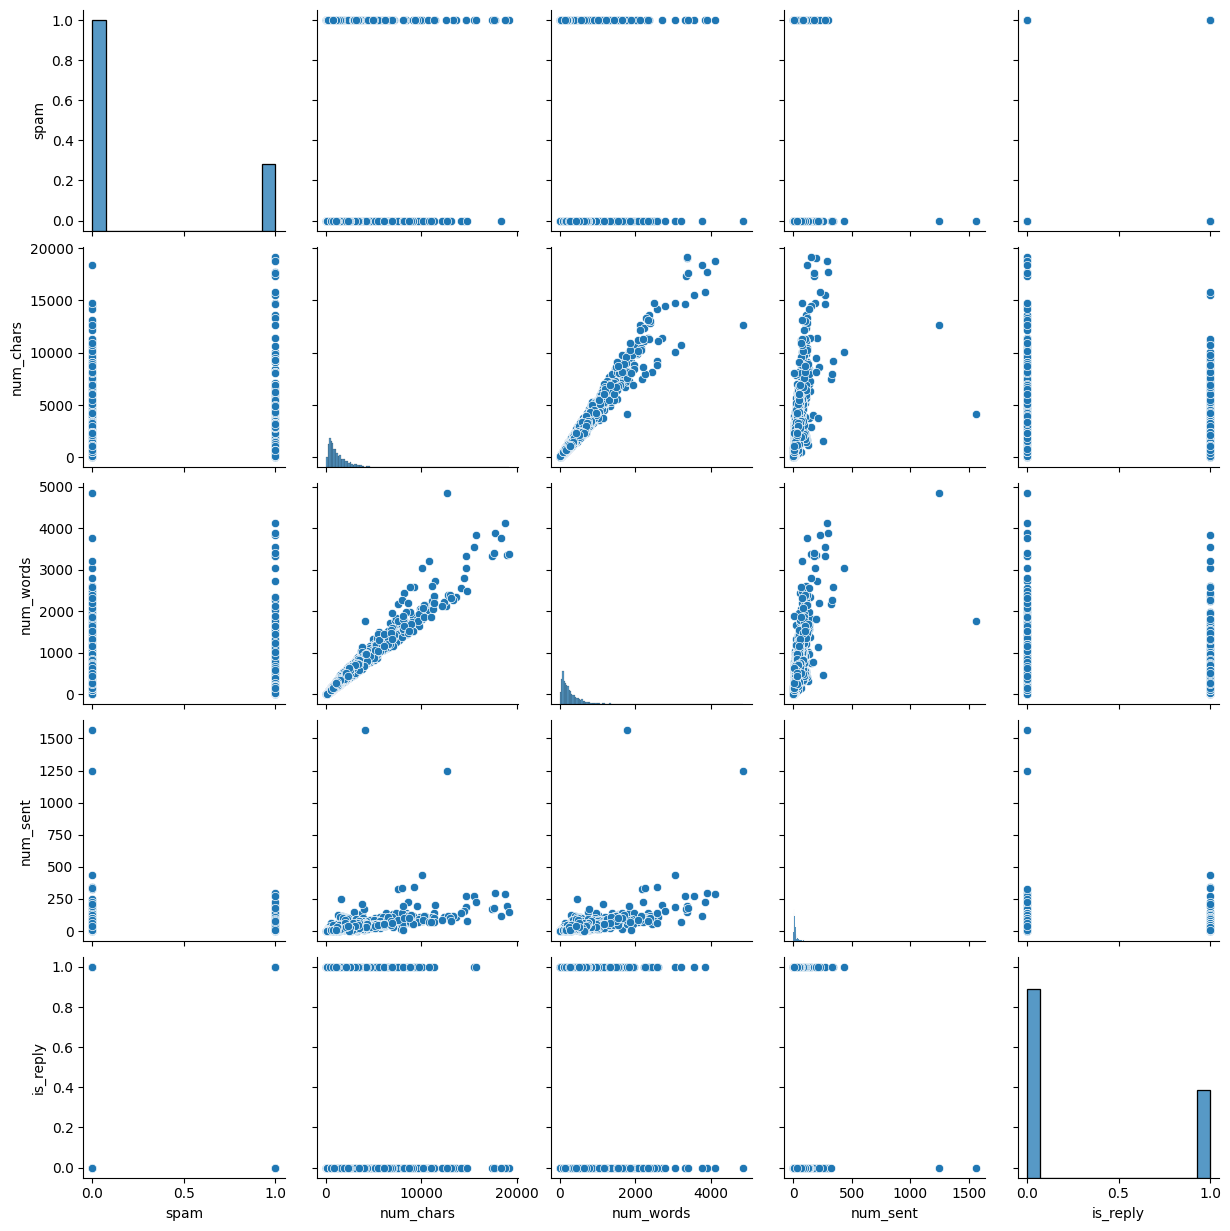

In [129]:
sns.pairplot(df)

In [106]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [124]:
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = word_tokenize(text)[1:]
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
           
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [127]:
df['transformed_text'] = df['text'].apply(transform_text)

In [130]:
df

,text,spam,num_chars,num_words,num_sent,is_reply,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,0,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,0,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,0,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,1,500,99,5,0,4 color print special request addit inform cli...
4,"Subject: do not have money , get software cds ...",1,235,53,9,0,money get softwar cd softwar compat great grow...
...,...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,1,research develop charg gpg forward shirley cre...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,1,receipt visit jim thank invit visit lsu shirle...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,1,enron case studi updat wow day super thank muc...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,1,interest david pleas call shirley crenshaw ass...


In [134]:
spam_corpus = []
for email in df[df['spam'] == 1]['transformed_text'].tolist():
    for word in email.split():
        spam_corpus.append(word)

In [135]:
len(spam_corpus)

168537

In [138]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('compani', 1036),
 ('com', 995),
 ('1', 926),
 ('busi', 864),
 ('mail', 861),
 ('email', 859),
 ('inform', 807),
 ('receiv', 693),
 ('get', 670),
 ('e', 659),
 ('5', 659),
 ('money', 625),
 ('pleas', 614),
 ('http', 602),
 ('free', 596),
 ('3', 595),
 ('2', 584),
 ('one', 572),
 ('time', 568),
 ('market', 565),
 ('make', 557),
 ('click', 549),
 ('use', 535),
 ('us', 534),
 ('invest', 523),
 ('secur', 513),
 ('000', 513),
 ('offer', 512),
 ('websit', 506),
 ('price', 501)]

In [139]:
ham_corpus = []
for email in df[df['spam'] == 0]['transformed_text'].tolist():
    for word in email.split():
        ham_corpus.append(word)

In [140]:
len(ham_corpus)

684641

In [142]:
Counter(ham_corpus).most_common(30)

[('enron', 13084),
 ('ect', 11410),
 ('vinc', 8466),
 ('hou', 5567),
 ('2000', 4917),
 ('kaminski', 4754),
 ('pleas', 4440),
 ('com', 4364),
 ('subject', 4233),
 ('would', 4025),
 ('cc', 3858),
 ('j', 3669),
 ('thank', 3536),
 ('pm', 3247),
 ('forward', 2936),
 ('2001', 2900),
 ('research', 2712),
 ('time', 2480),
 ('1', 2446),
 ('group', 2443),
 ('meet', 2406),
 ('know', 2325),
 ('manag', 2279),
 ('2', 2262),
 ('work', 2257),
 ('10', 2199),
 ('price', 2160),
 ('model', 2153),
 ('market', 2133),
 ('risk', 2091)]

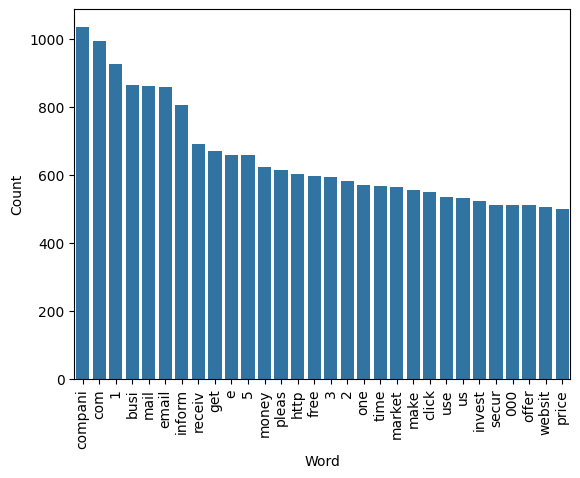

In [153]:
spam_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=spam_words_df)

plt.xticks(rotation=90)  # Rotate the x labels to make them readable
plt.show()

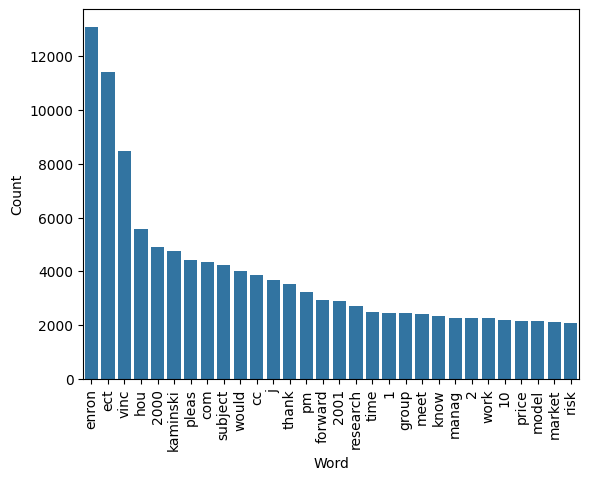

In [154]:
ham_words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=ham_words_df)

plt.xticks(rotation=90)  # Rotate the x labels to make them readable
plt.show()

# Model Building

In [173]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [157]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [158]:
X.shape

(5689, 28938)

In [161]:
y = df['spam'].values

In [162]:
from sklearn.model_selection import train_test_split 

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [203]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [165]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [166]:
gnb.fit(X_train, y_train)

GaussianNB()

In [167]:
pred1 = gnb.predict(X_test)

In [170]:
print('Accuracy Score: ', accuracy_score(y_test, pred1))
print('Precision Score: ', precision_score(y_test, pred1))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred1))

Accuracy Score:  0.9657293497363796
Precision Score:  0.9662921348314607
Confusion Matrix:
 [[841   9]
 [ 30 258]]


In [171]:
mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred2))
print('Precision Score: ', precision_score(y_test, pred2))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred2))

Accuracy Score:  0.9859402460456942
Precision Score:  0.9563758389261745
Confusion Matrix:
 [[837  13]
 [  3 285]]


In [172]:
bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred3))
print('Precision Score: ', precision_score(y_test, pred3))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred3))

Accuracy Score:  0.9789103690685413
Precision Score:  0.9714285714285714
Confusion Matrix:
 [[842   8]
 [ 16 272]]


In [174]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [175]:
y = df['spam'].values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [177]:
gnb.fit(X_train, y_train)
pred4 = gnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred4))
print('Precision Score: ', precision_score(y_test, pred4))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred4))

Accuracy Score:  0.9630931458699473
Precision Score:  0.9659090909090909
Confusion Matrix:
 [[841   9]
 [ 33 255]]


In [178]:
mnb.fit(X_train, y_train)
pred5 = mnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred5))
print('Precision Score: ', precision_score(y_test, pred5))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred5))

Accuracy Score:  0.8866432337434095
Precision Score:  0.9937888198757764
Confusion Matrix:
 [[849   1]
 [128 160]]


In [179]:
bnb.fit(X_train, y_train)
pred6 = bnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred6))
print('Precision Score: ', precision_score(y_test, pred6))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred6))

Accuracy Score:  0.9789103690685413
Precision Score:  0.9714285714285714
Confusion Matrix:
 [[842   8]
 [ 16 272]]


In [182]:
logr.fit(X_train, y_train)
pred = logr.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

Accuracy Score:  0.9806678383128296
Precision Score:  0.9925925925925926
Confusion Matrix:
 [[848   2]
 [ 20 268]]


In [185]:
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

Accuracy Score:  0.9833040421792618
Precision Score:  1.0
Confusion Matrix:
 [[850   0]
 [ 19 269]]


In [188]:
etc.fit(X_train, y_train)
pred = etc.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

Accuracy Score:  0.976274165202109
Precision Score:  1.0
Confusion Matrix:
 [[850   0]
 [ 27 261]]


In [191]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

Accuracy Score:  0.9789103690685413
Precision Score:  0.9888888888888889
Confusion Matrix:
 [[847   3]
 [ 21 267]]


In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [218]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()

In [222]:
clfs = {
    'SVC':svc,
    'KN': knc,
    'DTC':dtc,
    'LRC':lrc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc,
    'GBDT':gbdt
}

In [223]:
def training(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train, y_train)
    y_pred = clfs.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    return accuracy, precision

In [224]:
accuracy_score = []
precision_score = []

for name,clf in clfs.items():
    c_acc, c_prec = training(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print('Accuracy', c_acc)
    print('Precision', c_prec)
    
    accuracy_score.append(c_acc)
    precision_score.append(c_prec)

For SVC
Accuracy 0.992091388400703
Precision 0.9894736842105263
For KN
Accuracy 0.9789103690685413
Precision 0.9888888888888889
For DTC
Accuracy 0.9270650263620387
Precision 0.7887323943661971
For LRC
Accuracy 0.9806678383128296
Precision 0.9925925925925926
For RFC
Accuracy 0.9833040421792618
Precision 1.0
For ABC
Accuracy 0.9666080843585237
Precision 0.928082191780822
For BC
Accuracy 0.9718804920913884
Precision 0.9475524475524476
For ETC
Accuracy 0.976274165202109
Precision 1.0
For GBDT
Accuracy 0.9710017574692443
Precision 0.9739776951672863


In [225]:
perf_df = pd.DataFrame({'Algo':clfs.keys(), 
                        'Accuracy': accuracy_score,
                        'Precision': precision_score,
                       })

In [226]:
perf_df.sort_values('Precision', ascending=False)

,Algo,Accuracy,Precision
4,RFC,0.983304,1.000000
7,ETC,0.976274,1.000000
3,LRC,0.980668,0.992593
0,SVC,0.992091,0.989474
1,KN,0.978910,0.988889
8,GBDT,0.971002,0.973978
6,BC,0.971880,0.947552
5,ABC,0.966608,0.928082
2,DTC,0.927065,0.788732


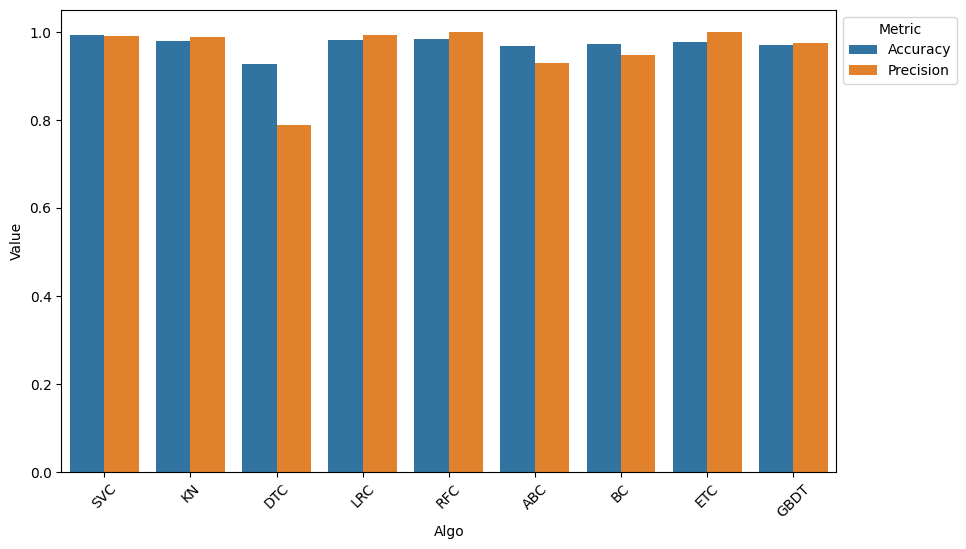

In [227]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Plotting both accuracy and precision in the same bar plot for each algorithm
# We use `melt` to transform the DataFrame so that we have only two columns for the values and one for the identifiers
perf_melted = perf_df.melt('Algo', var_name='Metric', value_name='Value')

# Create the barplot
barplot = sns.barplot(x='Algo', y='Value', hue='Metric', data=perf_melted)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend and informative axis label
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1,1))
# Show the plot
plt.show()

# Selected Model:
- Random Forest: Accuracy: 0.983304, Precison: 1.000000
- Extra Tree Classifier: Accuracy: 0.976274, Precison: 1.000000
- Logistic Regression: Accuracy: 0.980668, Precison:  0.992593